<a href="https://colab.research.google.com/github/sharvil10/COT5600_quantum_computing/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
def get_register(set_bit, m = 1):
  """
  Returns the m-qbit register
   
  Parameters
  ----------
  set_bit : int or list of int
      An integer or list of integers representing the bit(s) to be set
  m : Number of qbits
  
  Returns
  -------
  np.ndarray
      The register array as 1s and 0s.
  """
  dim = 2 ** m
  register = np.zeros((dim, 1))
  register[set_bit] = 1.0
  return register

##Controlled U-gate
![Image Not Found](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Controlled_gate.svg/320px-Controlled_gate.svg.png)

####"get_controlled_U_gate" returns the matrix used to represent controlled U-gate. The function operates on a m-bit register as input and a control bit.
##The transformation matrix is given as follows:

T = $|0><0| \otimes I_{2^m} + |1><1| \otimes U$

where U is the matrix representing the actual transformation to be applied if control gate is on.

In [0]:
def get_controlled_U_gate(U, m = 1):
  """
  Returns the transformation matrix of controlled-U gate based on the 
  U matrix transformation.
   
  Parameters
  ----------
  U : numpy.ndarray
      A unitary matrix describing the transformation.
  
  Returns
  -------
  np.ndarray
      A matrix describing the gate-transformation matrix.
  """
  dim = 2 ** m

  Im = np.eye(dim) #Identity matrix

  #Constants
  #0-bit in C^m
  zero_bit = get_register(set_bit = 0, m = 1)
  #1-bit in C^m
  one_bit =  get_register(set_bit = 1, m = 1)

  mat1 = zero_bit @ zero_bit.T #@ is numpy's Matrix multiplication operator
  mat2 = one_bit @ one_bit.T
  
  return np.kron(mat1, Im) + np.kron(mat2, U)

def apply_U_gate(cbit, qbit, T):
  """
  Applies the controlled U gate on qbit based on the value of cbit.
   
  Parameters
  ----------
  cbit : numpy.ndarray
      A vector of shape 2x1 describing the control bit.
  qbit : numpy.ndarray
      A vector describing the input q-bit.
  T : numpy.ndarray
      Transformation matrix of the controlled U gate.
  
  Returns
  -------
  np.ndarray
      A (2^m)x1 vector describing the output.
  """

  combined_bit = np.kron(cbit, qbit)
  return T @ combined_bit

##Controlled U-gate test
If we want to make controlled NOT gate from a controlled U-gate we can set

U $= \begin{bmatrix}
0 & 1\\
1 & 0\\
\end{bmatrix}$.
Below the code will set the U as NOT-gate and will show output for each control bit and qbit. The output represents state as $|c> \otimes$ $|c \oplus t>$

For example for qbit 0 and control bit 1 the output state should be 

$\psi$ $= |1> \otimes |1> = \begin{bmatrix}
0\\
0\\
0\\
1\\
\end{bmatrix}$.

In [51]:
U = np.eye(2)[:, ::-1]
print('U matrix is: ')
print(U)
for j in range(2):
  for i in range(2):
    qb = get_register(set_bit=i)
    ctrl = get_register(set_bit=j)
    trans = get_controlled_U_gate(U)
    out = apply_U_gate(ctrl, qb, trans)
    print('Q-bit is {}, Control-bit is {}. The output state is'.format(i, j))
    print(out)

U matrix is: 
[[0. 1.]
 [1. 0.]]
Q-bit is 0, Control-bit is 0. The output state is
[[1.]
 [0.]
 [0.]
 [0.]]
Q-bit is 1, Control-bit is 0. The output state is
[[0.]
 [1.]
 [0.]
 [0.]]
Q-bit is 0, Control-bit is 1. The output state is
[[0.]
 [0.]
 [0.]
 [1.]]
Q-bit is 1, Control-bit is 1. The output state is
[[0.]
 [0.]
 [1.]
 [0.]]


#Hadamard matrix:

H = $\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1\\
1 & -1\\
\end{bmatrix}$.

In [0]:
def get_hadamard_trans():
  """
  Parameters
  ----------


  Returns
  -------
  np.ndarray
      Hadamard matrix
  """
  H = np.ones((2,2), dtype = np.float)
  H[1, 1] = -1
  H /= np.sqrt(2)
  return H

##Single-qubit gate U on first qubit

In [0]:
def get_first_bit_transformation(U, m = 1):
  dim = 2 ** m
  return np.kron(U, np.eye(dim))

##Hadamard-Test
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Hadamard_test_measure_real.png/320px-Hadamard_test_measure_real.png)

As shown in the figure Steps to perform hadamard test are listed below.


1.   Apply Hadamard transformatin to only the first qbit.
2.   Apply Controlled-U gate. U is the input here which will be based on $\theta$
3.   Apply Hadamard transformation to only the first qbit.
4.   Measure the probability.

Note that below function applies Only Steps 1-3.

In [0]:
def apply_hadamard_test(qbit, H, U, m = 1):
  T = get_controlled_U_gate(U, m)
  zero_bit = get_register(set_bit = 0, m = 1) #0-bit in C^2
  zero_trans = H @ zero_bit #Apply H matrix on zero-qbit
  combined_state = apply_U_gate(zero_trans, qbit, T)
  
  T2 = get_first_bit_transformation(H, m) #Get transformation to apply only on the first-bit
  #print(T2.shape, combined_state.shape)
  return T2 @ combined_state

##For given $\theta$ the rotation matrix is:

U = $\begin{bmatrix}
cos(\theta) & -sin(\theta)\\
sin(\theta) & cos(\theta)\\
\end{bmatrix}$ where $\theta\in[0, 2\pi\theta)$

In [0]:
def get_rot_matrix(theta):
  assert (theta < 1.0) and (theta >= 0.0), "Theta should be between [0,1] inclusive"
  theta = np.pi * 2 * theta
  ct = np.cos(theta)
  st = np.sin(theta)
  R = np.array([[ct, -st], [st, ct]])
  return R

##Projection matrix used for measurement

P = $|0><0| \otimes I_2$ =
$  \left[\begin{array}{c|c}
    I_2 & 0 \\\hline
    0 & 0 \\
  \end{array}\right]$


In [0]:
def get_hadamard_proj_mat():
  
  zero_bit = get_register(set_bit = 0, m = 1) #0-bit in C^2
  I2 = np.eye(2)
  P = np.kron(zero_bit @ zero_bit.T, I2)
  return P

##Applying Hadamard test for each theta value
As the unitary matrix here represents rotation by theta within the unit circle, we should be able to see Pr(0) = 0.0 as $\theta$ approaches $0.5$ as that's the furthest point(x = -1, y = 0) on the circle from x = 1, y = 0.


In [0]:
x = np.arange(0.0, 1.0, 0.01)#Theta values
y = np.zeros_like(x)#Probabilities
psi = get_register(set_bit = 0, m = 1)
H = get_hadamard_trans()
P = get_hadamard_proj_mat()

for i, theta in enumerate(x):
  U = get_rot_matrix(theta)
  phi = apply_hadamard_test(psi, H, U)
  proj = P @ phi
  p_0 = proj.T @ proj
  y[i] = p_0


In [0]:
import matplotlib.pyplot as plt

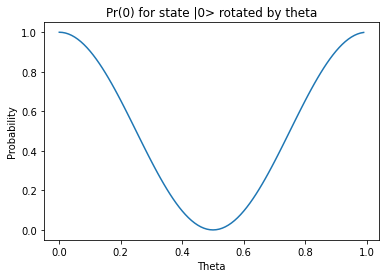

In [59]:
plt.plot(x, y)
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.title("Pr(0) for state |0> rotated by theta")
plt.show()

#SWAP test: Q-2 starts here

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Quantum-swap-test-circuit-correct.png/320px-Quantum-swap-test-circuit-correct.png)

For SWAP test the procedure is almost same as Hadamard test except now we have 2 input states and the U matrix is the SWAP matrix which will return a $C^4$ state. SO the controlled operation becomes

$|0><0| \otimes I_4 + |1><1| \otimes S$.

where S = $|00><00| + |01><10| + |10><01| + |11><11|$

In [0]:
#Q-2 SWAP Test
def get_swap_matrix():
  m = 2
  dim = 2 ** m
  S = np.zeros((dim, dim))
  for i in range(m):
    q1 = get_register(set_bit = i, m = 1)
    for j in range(m):
      q2 = get_register(set_bit = j, m = 1)
      vec1 = np.kron(q1, q2)
      vec2 = np.kron(q2, q1)
      S += vec1 @ vec2.T

  return S

####For SWAP test to measure the probability we will use the projection matrix:

P = $|0><0| \otimes I_4$

In [0]:
def get_swap_proj_mat():
  zero_bit = get_register(set_bit = 0, m = 1) #0-bit in C^2
  I4 = np.eye(4)
  P = np.kron(zero_bit @ zero_bit.T, I4)
  return P

###The SWAP test compares the similarity between 2 states. Pr(0) will be 1 for most similar states. Here, we have kept 1 state fixed as $\psi_1$ = $|0>$ and change the other state as $\psi_2$ = $cos(2\pi\theta)|0>$ $+$ $sin(2\pi\theta)|1>$ . As we change the value of theta $\psi_2$ will become weighted average of $|0>$ and $|1>$ states. 

###We expect to get Pr(0) = 1 when $\psi_2$ is |0> which will happen when $\theta =$ 0, or 0.5, 1.0.

###We expect to get Pr(0) = 0 when $\psi_2$ is |1> which will happen when $\theta =$ 0.25, or 0.75. so the state $\psi_1$ and $\psi_2$ will be perpendicular.

In [0]:
x = np.arange(0.0, 1.0, 0.01)
y = np.zeros_like(x)
psi1 = get_register(set_bit = 0, m = 1)
zero_bit = get_register(set_bit = 0, m = 1)
one_bit = get_register(set_bit = 1, m = 1)
H = get_hadamard_trans()
P = get_swap_proj_mat()
S = get_swap_matrix()

for i, theta in enumerate(x):
  theta = np.pi * 2 * theta
  ct = np.cos(theta)
  st = np.sin(theta)
  psi2 = ct * zero_bit + st * one_bit
  psi = np.kron(psi1, psi2)
  phi = apply_hadamard_test(psi, H, S, m = 2)
  proj = P @ phi
  p_0 = proj.T @ proj
  y[i] = p_0


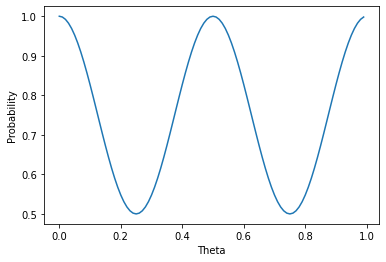

In [63]:
plt.plot(x, y)
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.show()